In [1]:
import pandas as pd          
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.concat(map(pd.read_csv, ['tennis_atp/atp_matches_2018.csv','tennis_atp/atp_matches_2019.csv', 'tennis_atp/atp_matches_2020.csv','tennis_atp/atp_matches_2021.csv','tennis_atp/atp_matches_2022.csv','tennis_atp/atp_matches_2023.csv','tennis_atp/atp_matches_2024.csv']))

In [3]:
# Remove identifying data
# Find a way to include tourney_level and score
df = df.drop(columns=['winner_id', 'winner_name', 'winner_ioc', 
                      'loser_id', 'loser_name', 'loser_ioc', 
                      'tourney_id', 'tourney_name', 'tourney_level', 
                      'tourney_date', 'match_num', 'winner_seed', 
                      'winner_entry', 'loser_seed', 'loser_entry','score', 'draw_size', 'best_of', 'round'])

In [4]:
# Check for missing values.
print(df.isnull().sum())

# There are zero duplicates no action needed
print(df.duplicated().sum())

# Drop any rows with nulls in them
df = df.dropna()

# Check total number of rows, should be over 15k
row_count = len(df)
print(row_count)

surface                 53
winner_hand              0
winner_ht               79
winner_age               3
loser_hand               1
loser_ht               227
loser_age                3
minutes               1033
w_ace                  694
w_df                   694
w_svpt                 694
w_1stIn                694
w_1stWon               694
w_2ndWon               694
w_SvGms                694
w_bpSaved              694
w_bpFaced              694
l_ace                  694
l_df                   694
l_svpt                 694
l_1stIn                694
l_1stWon               694
l_2ndWon               694
l_SvGms                694
l_bpSaved              694
l_bpFaced              694
winner_rank             79
winner_rank_points      79
loser_rank             222
loser_rank_points      222
dtype: int64
2
17547


## Convert Categorical Variables to Numerical

In [5]:
winner_encoder = LabelEncoder()
loser_encoder = LabelEncoder()
surface_encoder = LabelEncoder()
round_encoder = LabelEncoder()


df['winner_hand'] = winner_encoder.fit_transform(df['winner_hand'])
df['loser_hand'] = loser_encoder.fit_transform(df['loser_hand'])
df['surface'] = surface_encoder.fit_transform(df['surface'])
# df['round'] = round_encoder.fit_transform(df['round'])

In [6]:
# Rename values to not be associated with winner.
df = df.rename(columns={
    'winner_age': 'p1_age',
    'winner_ht': 'p1_ht',
    'winner_hand': 'p1_hand',
    'winner_rank': 'p1_rank',
    'winner_rank_points': 'p1_rank_points',
    'loser_age': 'p2_age',
    'loser_ht': 'p2_ht',
    'loser_hand': 'p2_hand',
    'loser_rank': 'p2_rank',
    'loser_rank_points': 'p2_rank_points',
    
    'w_ace': 'p1_ace',
    'w_df': 'p1_df',
    'w_svpt': 'p1_svpt',
    'w_1stIn': 'p1_1stIn',
    'w_1stWon': 'p1_1stWon',
    'w_2ndWon': 'p1_2ndWon',
    'w_SvGms': 'p1_SvGms',
    'w_bpSaved': 'p1_bpSaved',
    'w_bpFaced': 'p1_bpFaced',

    'l_ace': 'p2_ace',
    'l_df': 'p2_df',
    'l_svpt': 'p2_svpt',
    'l_1stIn': 'p2_1stIn',
    'l_1stWon': 'p2_1stWon',
    'l_2ndWon': 'p2_2ndWon',
    'l_SvGms': 'p2_SvGms',
    'l_bpSaved': 'p2_bpSaved',
    'l_bpFaced': 'p2_bpFaced'
})

swap_mask = np.random.rand(len(df)) > 0.5

swap_cols = [
    'age', 'ht', 'hand', 'rank', 'rank_points',
    'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced'
]

for col in swap_cols:
    temp = df.loc[swap_mask, f'p1_{col}'].copy()
    df.loc[swap_mask, f'p1_{col}'] = df.loc[swap_mask, f'p2_{col}']
    df.loc[swap_mask, f'p2_{col}'] = temp

df['winner'] = np.where(swap_mask, 1, 0)

print(df['winner'].value_counts())

winner
1    8796
0    8751
Name: count, dtype: int64


In [7]:
# Display the first and last few rows of the dataset.
display(df.head())
display(df.tail())

# Display the info of the dataset.
display(df.info())

# Display summary statistics of the dataset.
display(df.describe())

,surface,p1_hand,p1_ht,p1_age,p2_hand,p2_ht,p2_age,minutes,p1_ace,p1_df,...,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,p1_rank,p1_rank_points,p2_rank,p2_rank_points,winner
0,2,1,185.0,25.6,1,188.0,30.6,123.0,9.0,2.0,...,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0,0
1,2,1,183.0,23.7,1,188.0,21.2,90.0,3.0,5.0,...,25.0,14.0,9.0,4.0,5.0,94.0,593.0,54.0,890.0,1
2,2,1,175.0,25.6,1,185.0,31.3,145.0,8.0,6.0,...,48.0,12.0,14.0,9.0,11.0,30.0,1391.0,63.0,809.0,1
3,2,1,188.0,28.0,1,183.0,18.8,104.0,6.0,2.0,...,32.0,17.0,11.0,2.0,3.0,44.0,1055.0,208.0,245.0,1
4,2,1,188.0,19.9,0,193.0,27.2,69.0,5.0,4.0,...,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0,0


,surface,p1_hand,p1_ht,p1_age,p2_hand,p2_ht,p2_age,minutes,p1_ace,p1_df,...,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,p1_rank,p1_rank_points,p2_rank,p2_rank_points,winner
3064,2,1,183.0,28.2,1,175.0,25.0,87.0,2.0,1.0,...,25.0,11.0,9.0,2.0,3.0,819.0,24.0,569.0,64.0,1
3066,2,1,178.0,31.0,1,188.0,28.8,65.0,4.0,2.0,...,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0,0
3068,0,0,185.0,23.9,1,188.0,21.8,137.0,1.0,2.0,...,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0,0
3070,0,1,175.0,34.2,0,185.0,23.9,95.0,2.0,1.0,...,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0,0
3074,2,1,175.0,26.9,1,185.0,27.3,159.0,0.0,1.0,...,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0,0


<class 'pandas.core.frame.DataFrame'>
Index: 17547 entries, 0 to 3074
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   surface         17547 non-null  int32  
 1   p1_hand         17547 non-null  int32  
 2   p1_ht           17547 non-null  float64
 3   p1_age          17547 non-null  float64
 4   p2_hand         17547 non-null  int32  
 5   p2_ht           17547 non-null  float64
 6   p2_age          17547 non-null  float64
 7   minutes         17547 non-null  float64
 8   p1_ace          17547 non-null  float64
 9   p1_df           17547 non-null  float64
 10  p1_svpt         17547 non-null  float64
 11  p1_1stIn        17547 non-null  float64
 12  p1_1stWon       17547 non-null  float64
 13  p1_2ndWon       17547 non-null  float64
 14  p1_SvGms        17547 non-null  float64
 15  p1_bpSaved      17547 non-null  float64
 16  p1_bpFaced      17547 non-null  float64
 17  p2_ace          17547 non-null  float

None

,surface,p1_hand,p1_ht,p1_age,p2_hand,p2_ht,p2_age,minutes,p1_ace,p1_df,...,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,p1_rank,p1_rank_points,p2_rank,p2_rank_points,winner
count,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,...,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000,17547.000000
mean,1.304383,0.862313,187.210520,27.141187,0.858950,187.246937,27.133898,115.207215,6.373910,2.949963,...,35.965692,15.467715,12.620676,4.121502,6.720864,79.990825,1516.122927,79.040463,1541.212458,0.501282
std,0.893933,0.344581,7.131535,4.575317,0.348083,7.061062,4.569432,42.268962,5.481583,2.446860,...,14.112717,6.846431,4.216048,3.234895,4.420665,109.419611,1704.846301,106.769335,1743.188680,0.500013
min,0.000000,0.000000,15.000000,16.400000,0.000000,15.000000,16.500000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,183.000000,23.600000,1.000000,183.000000,23.600000,83.000000,2.000000,1.000000,...,26.000000,11.000000,10.000000,2.000000,3.000000,26.000000,640.000000,25.000000,647.500000,0.000000
50%,2.000000,1.000000,188.000000,26.800000,1.000000,188.000000,26.800000,108.000000,5.000000,2.000000,...,34.000000,14.000000,12.000000,4.000000,6.000000,55.000000,950.000000,55.000000,948.000000,1.000000
75%,2.000000,1.000000,193.000000,30.300000,1.000000,193.000000,30.300000,139.000000,9.000000,4.000000,...,44.000000,19.000000,15.000000,6.000000,9.000000,94.000000,1628.000000,94.000000,1640.000000,1.000000
max,2.000000,1.000000,211.000000,42.500000,1.000000,211.000000,42.300000,396.000000,67.000000,26.000000,...,171.000000,56.000000,50.000000,27.000000,35.000000,1921.000000,12415.000000,2146.000000,12415.000000,1.000000


In [8]:
# Check for missing values.
print(df.isnull().sum())

# There are zero duplicates
print(df.duplicated().sum())

surface           0
p1_hand           0
p1_ht             0
p1_age            0
p2_hand           0
p2_ht             0
p2_age            0
minutes           0
p1_ace            0
p1_df             0
p1_svpt           0
p1_1stIn          0
p1_1stWon         0
p1_2ndWon         0
p1_SvGms          0
p1_bpSaved        0
p1_bpFaced        0
p2_ace            0
p2_df             0
p2_svpt           0
p2_1stIn          0
p2_1stWon         0
p2_2ndWon         0
p2_SvGms          0
p2_bpSaved        0
p2_bpFaced        0
p1_rank           0
p1_rank_points    0
p2_rank           0
p2_rank_points    0
winner            0
dtype: int64
0


## Drop Nulls

In [9]:
# Drop any rows with nulls in them
df = df.dropna()

# Check 
row_count = len(df)
print(row_count)

17547


## Scale Features

In [10]:
scaler = StandardScaler()
y = df['winner'].values

X = df.drop(columns=['winner'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

display(y)
display(X)

array([0, 1, 1, ..., 0, 0, 0])

array([[ 0.77817611,  0.39959004, -0.309973  , ..., -0.29688151,
        -0.25326779, -0.3626862 ],
       [ 0.77817611,  0.39959004, -0.59042553, ..., -0.54148531,
        -0.23453528, -0.37358607],
       [ 0.77817611,  0.39959004, -1.71223564, ..., -0.07339459,
        -0.15023902, -0.42005397],
       ...,
       [-1.45919178, -2.50256491, -0.309973  , ..., -0.85706527,
         6.19071357, -0.8646542 ],
       [-1.45919178,  0.39959004, -1.71223564, ..., -0.60248962,
         5.02929832, -0.85260696],
       [ 0.77817611,  0.39959004, -1.71223564, ..., -0.85002632,
         3.15604793, -0.82162837]])

## Split data into testing and training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
display(y_train)

array([0, 1, 1, ..., 0, 1, 0])

### Reusable function for evaluation

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(y_pred_test, y_pred_train):
  print("=== Test Metrics ===")
  accuracy_test = accuracy_score(y_test, y_pred_test)
  print(f"Accuracy: {accuracy_test}")

  precision_test = precision_score(y_test, y_pred_test, average='binary')
  print(f"Precision: {precision_test}")

  recall_test = recall_score(y_test, y_pred_test, average='binary')
  print(f"Recall: {recall_test}")

  f1_test = f1_score(y_test, y_pred_test, average='binary')
  print(f"F1 Score: {f1_test}")

  print("\n=== Training Metrics ===")
  accuracy_train = accuracy_score(y_train, y_pred_train)
  print(f"Accuracy: {accuracy_train}")

  precision_train = precision_score(y_train, y_pred_train, average='binary')
  print(f"Precision: {precision_train}")

  recall_train = recall_score(y_train, y_pred_train, average='binary')
  print(f"Recall: {recall_train}")

  f1_train = f1_score(y_train, y_pred_train, average='binary')
  print(f"F1 Score: {f1_train}")

  # Show the shape of training data
  print("\nX_train shape:", X_train.shape)

  # Confusion matrix for test data
  cm = confusion_matrix(y_test, y_pred_test)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Class 0', 'Class 1'],
              yticklabels=['Class 0', 'Class 1'])
  plt.title('Confusion Matrix (Test Data)')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

## Logistic Regression

=== Test Metrics ===
Accuracy: 0.9501424501424501
Precision: 0.9478991596638655
Recall: 0.9537767756482526
F1 Score: 0.9508288845181231

=== Training Metrics ===
Accuracy: 0.9521265227612737
Precision: 0.9525370581527937
Recall: 0.9517231557960695
F1 Score: 0.9521299330388945

X_train shape: (14037, 30)


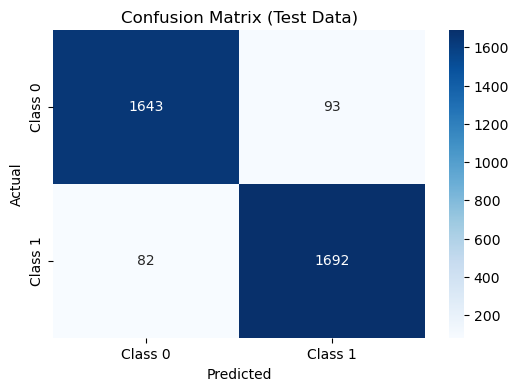

In [51]:
from sklearn.linear_model import LogisticRegression

# Train the model
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions for test data
y_pred_test = clf.predict(X_test)

# Predictions for training data
y_pred_train = clf.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.9501424501424501
Precision: 0.9468977082168809
Recall: 0.9549041713641488
F1 Score: 0.9508840864440079

=== Training Metrics ===
Accuracy: 0.9519840421742538
Precision: 0.9522656027358222
Recall: 0.9517231557960695
F1 Score: 0.951994301994302

X_train shape: (14037, 30)


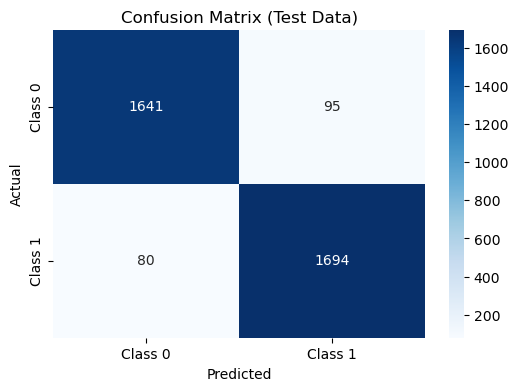

In [52]:
from sklearn.ensemble import BaggingClassifier
# Use logistic model
bagging_clf = BaggingClassifier(estimator=clf, n_estimators=50, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Boosting

=== Test Metrics ===
Accuracy: 0.9316239316239316
Precision: 0.9237569060773481
Recall: 0.9425028184892897
F1 Score: 0.9330357142857143

=== Training Metrics ===
Accuracy: 0.930754434708271
Precision: 0.927622278767317
Recall: 0.9344915978353745
F1 Score: 0.931044267877412

X_train shape: (14037, 30)


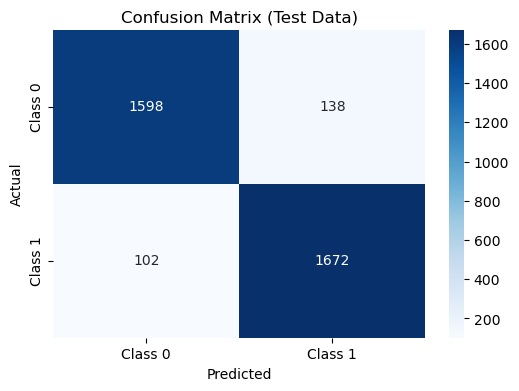

In [53]:
from sklearn.ensemble import AdaBoostClassifier
# Use logistic model
boosting_clf = AdaBoostClassifier(estimator=clf, n_estimators=100, algorithm="SAMME", random_state=0)
# Train
boosting_clf.fit(X_train, y_train)
# Predict
y_pred_train = boosting_clf.predict(X_train)
y_pred_test = boosting_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

## DecisionTreeClassifier

=== Test Metrics ===
Accuracy: 0.7868945868945869
Precision: 0.7557328015952144
Recall: 0.85456595264938
F1 Score: 0.8021164021164021

=== Training Metrics ===
Accuracy: 0.7854242359478522
Precision: 0.750625
Recall: 0.8551694673882085
F1 Score: 0.7994940753561444

X_train shape: (14037, 30)


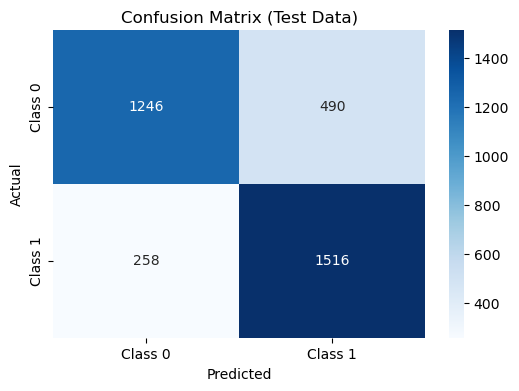

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train the model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X_train, y_train)

# Predictions for test data
y_pred_test = clf.predict(X_test)

# Predictions for training data
y_pred_train = clf.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.9501424501424501
Precision: 0.9468977082168809
Recall: 0.9549041713641488
F1 Score: 0.9508840864440079

=== Training Metrics ===
Accuracy: 0.9519840421742538
Precision: 0.9522656027358222
Recall: 0.9517231557960695
F1 Score: 0.951994301994302

X_train shape: (14037, 30)


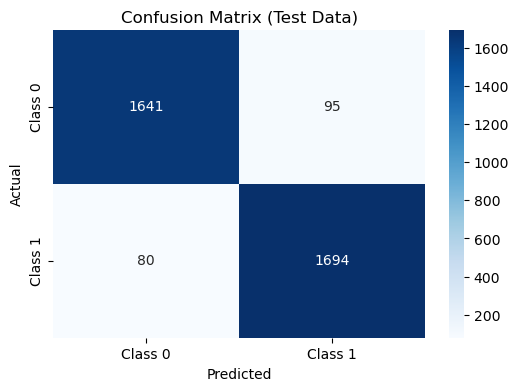

In [54]:
# Use decision tree model
bagging_clf = BaggingClassifier(estimator=clf, n_estimators=50, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Boosting

=== Test Metrics ===
Accuracy: 0.9316239316239316
Precision: 0.9237569060773481
Recall: 0.9425028184892897
F1 Score: 0.9330357142857143

=== Training Metrics ===
Accuracy: 0.930754434708271
Precision: 0.927622278767317
Recall: 0.9344915978353745
F1 Score: 0.931044267877412

X_train shape: (14037, 30)


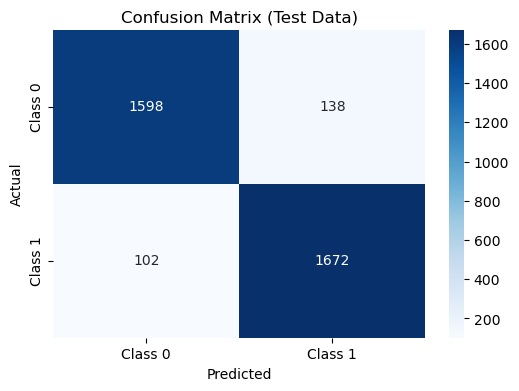

In [55]:
# Use decision tree model
boosting_clf = AdaBoostClassifier(estimator=clf, n_estimators=100, algorithm="SAMME", random_state=0)
# Train
boosting_clf.fit(X_train, y_train)
# Predict
y_pred_train = boosting_clf.predict(X_train)
y_pred_test = boosting_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

## Random Forest

=== Test Metrics ===
Accuracy: 0.8723646723646724
Precision: 0.8687430478309233
Recall: 0.8804960541149943
F1 Score: 0.8745800671892497

=== Training Metrics ===
Accuracy: 0.9368810999501318
Precision: 0.9355479840999432
Recall: 0.9384790657932213
F1 Score: 0.9370112327598464

X_train shape: (14037, 30)


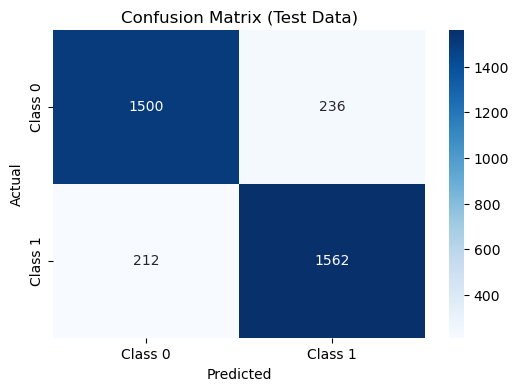

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

# Predictions
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.8723646723646724
Precision: 0.8691536748329621
Recall: 0.8799323562570462
F1 Score: 0.8745098039215686

=== Training Metrics ===
Accuracy: 0.9265512573911805
Precision: 0.9239915074309979
Recall: 0.9296496724579891
F1 Score: 0.9268119542840917

X_train shape: (14037, 30)


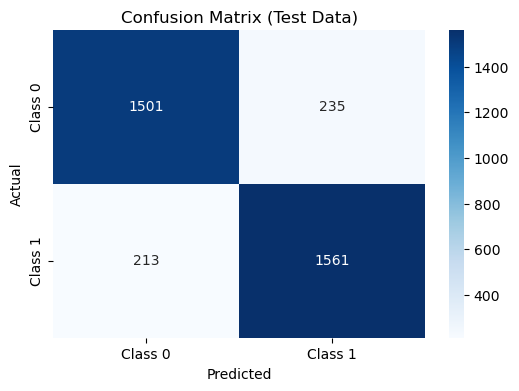

In [57]:
# Use random forest model
bagging_clf = BaggingClassifier(estimator=clf, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Boosting

=== Test Metrics ===
Accuracy: 0.9074074074074074
Precision: 0.9040713887339654
Recall: 0.9137542277339347
F1 Score: 0.9088870199046818

=== Training Metrics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

X_train shape: (14037, 30)


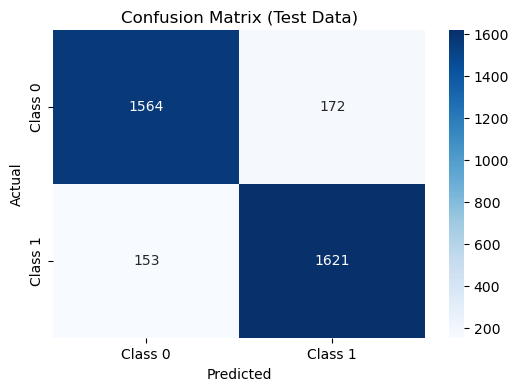

In [58]:
# Use random forest model
boosting_clf = AdaBoostClassifier(estimator=clf, n_estimators=15, algorithm="SAMME", random_state=0)
# Train
boosting_clf.fit(X_train, y_train)
# Predict
y_pred_train = boosting_clf.predict(X_train)
y_pred_test = boosting_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

## KNN

=== Test Metrics ===
Accuracy: 0.8284900284900285
Precision: 0.8273743016759777
Recall: 0.8348365276211951
F1 Score: 0.8310886644219978

=== Training Metrics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

X_train shape: (14037, 30)


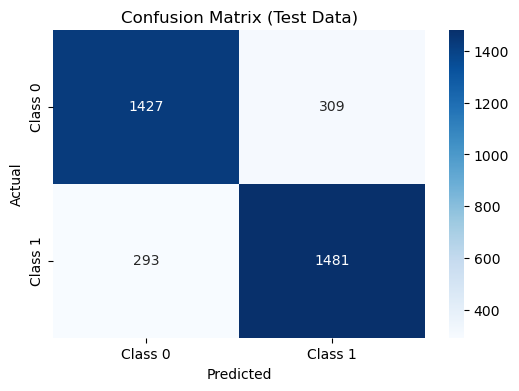

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the model
neigh = KNeighborsClassifier(n_neighbors=100, weights='distance', algorithm='auto')
neigh.fit(X_train, y_train)

# Predictions
y_pred_test = neigh.predict(X_test)
y_pred_train = neigh.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.8723646723646724
Precision: 0.8691536748329621
Recall: 0.8799323562570462
F1 Score: 0.8745098039215686

=== Training Metrics ===
Accuracy: 0.9265512573911805
Precision: 0.9239915074309979
Recall: 0.9296496724579891
F1 Score: 0.9268119542840917

X_train shape: (14037, 30)


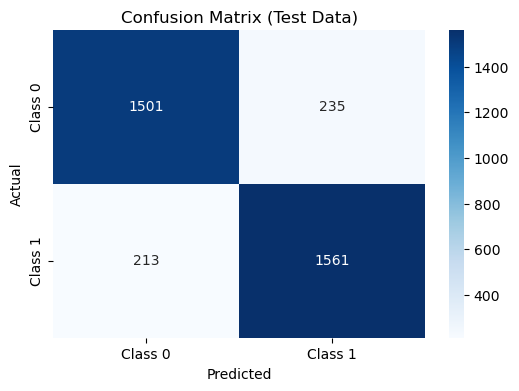

In [60]:
# Use KNN model
bagging_clf = BaggingClassifier(estimator=clf, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Boosting

=== Test Metrics ===
Accuracy: 0.9074074074074074
Precision: 0.9040713887339654
Recall: 0.9137542277339347
F1 Score: 0.9088870199046818

=== Training Metrics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

X_train shape: (14037, 30)


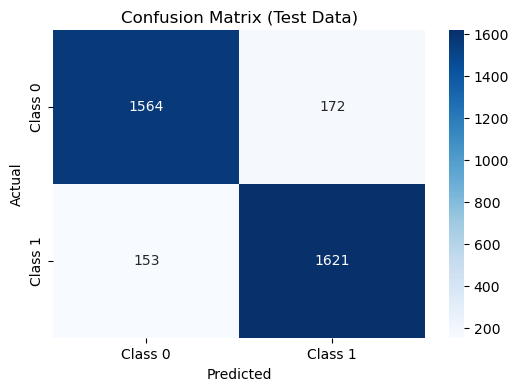

In [61]:
# Use KNN model
boosting_clf = AdaBoostClassifier(estimator=clf, n_estimators=15, algorithm="SAMME", random_state=0)
# Train
boosting_clf.fit(X_train, y_train)
# Predict
y_pred_train = boosting_clf.predict(X_train)
y_pred_test = boosting_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

## Ball Tree

## KD Tree

## SVM Linear Kernel

=== Test Metrics ===
Accuracy: 0.949002849002849
Precision: 0.9457797652319732
Recall: 0.9537767756482526
F1 Score: 0.9497614369912994

=== Training Metrics ===
Accuracy: 0.9523402436418038
Precision: 0.952170818505338
Recall: 0.9525776132156081
F1 Score: 0.9523741724211575

X_train shape: (14037, 30)


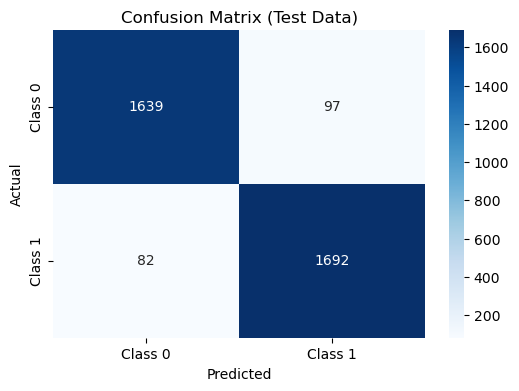

In [62]:
from sklearn.svm import LinearSVC

# Train the model
clf = LinearSVC(random_state=0, tol=1e-5, C=1.0)
clf.fit(X_train, y_train)

# Predictions
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.949002849002849
Precision: 0.9457797652319732
Recall: 0.9537767756482526
F1 Score: 0.9497614369912994

=== Training Metrics ===
Accuracy: 0.9528389256963739
Precision: 0.9527334851936219
Recall: 0.9530048419253774
F1 Score: 0.9528691442403531

X_train shape: (14037, 30)


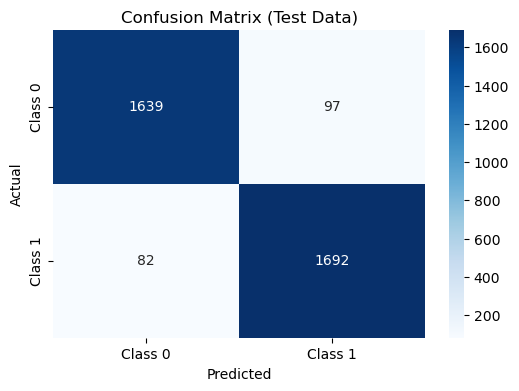

In [63]:
# Use linear SVM model
bagging_clf = BaggingClassifier(estimator=clf, n_estimators=50, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Boosting

=== Test Metrics ===
Accuracy: 0.9262108262108262
Precision: 0.9173553719008265
Recall: 0.9385569334836528
F1 Score: 0.9278350515463918

=== Training Metrics ===
Accuracy: 0.9315380779368811
Precision: 0.9244992295839753
Recall: 0.9399031614924523
F1 Score: 0.9321375609067156

X_train shape: (14037, 30)


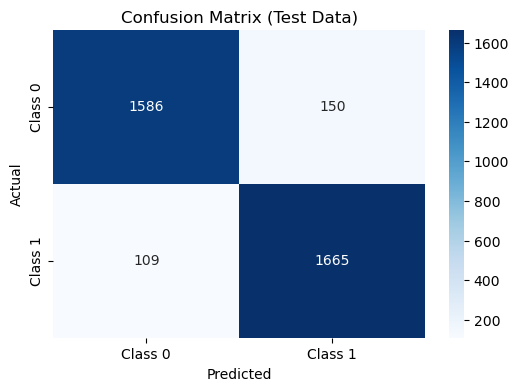

In [64]:
# Use linear SVM model
boosting_clf = AdaBoostClassifier(estimator=clf, n_estimators=100, algorithm="SAMME", random_state=0)
# Train
boosting_clf.fit(X_train, y_train)
# Predict
y_pred_train = boosting_clf.predict(X_train)
y_pred_test = boosting_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

## SVM Gaussian Kernel

=== Test Metrics ===
Accuracy: 0.9387464387464387
Precision: 0.9411431805319751
Recall: 0.9374295377677565
F1 Score: 0.9392826885060718

=== Training Metrics ===
Accuracy: 0.9628125667877752
Precision: 0.9644184052586453
Recall: 0.961122187410994
F1 Score: 0.9627674750356633

X_train shape: (14037, 30)


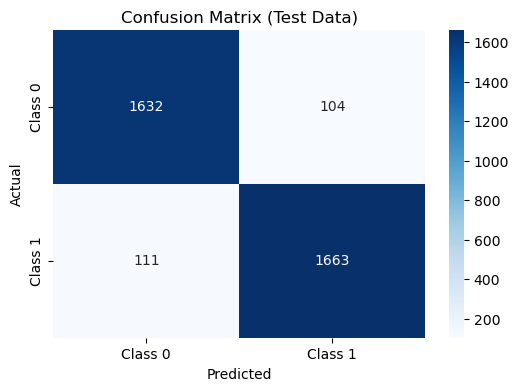

In [66]:
from sklearn.svm import SVC

# Train the model
clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
clf.fit(X_train, y_train)

# Make predictions
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

evaluate_model(y_pred_test, y_pred_train)

### Bagging

=== Test Metrics ===
Accuracy: 0.9393162393162393
Precision: 0.9452367370222475
Recall: 0.9340473506200676
F1 Score: 0.9396087326339665

=== Training Metrics ===
Accuracy: 0.9618152026786351
Precision: 0.9663503019844694
Recall: 0.9569923098832241
F1 Score: 0.9616485403548941

X_train shape: (14037, 30)


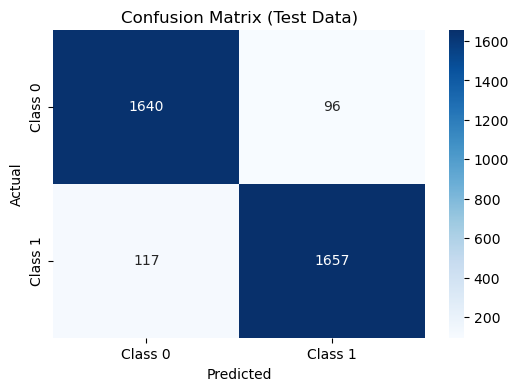

In [67]:
# Use gaussian SVM model
bagging_clf = BaggingClassifier(estimator=clf, random_state=0)
# Train
bagging_clf.fit(X_train, y_train)
# Predict
y_pred_train = bagging_clf.predict(X_train)
y_pred_test = bagging_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

# Note: Boosting results in the model predicting all 1s

## Stacking

### Decision Tree, KNN, & Random Forest -> Logistic

=== Test Metrics ===
Accuracy: 0.8843304843304843
Precision: 0.8808463251670379
Recall: 0.8917700112739572
F1 Score: 0.8862745098039215

=== Training Metrics ===
Accuracy: 0.9942295362256892
Precision: 0.9954318344039972
Recall: 0.9930219310737681
F1 Score: 0.9942254223996578

X_train shape: (14037, 30)


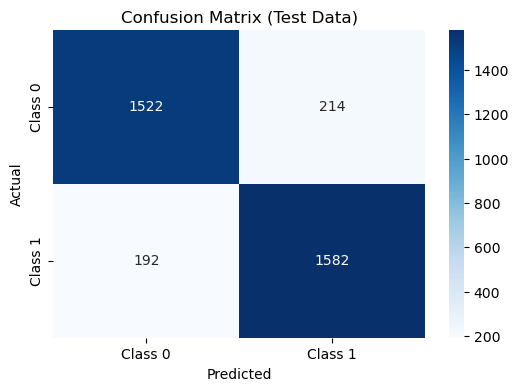

In [79]:
from sklearn.ensemble import StackingClassifier
estimators = [
  ["DecisionTreeClassifier", DecisionTreeClassifier(criterion='entropy', random_state=0)],
  ["KNeighborsClassifier", KNeighborsClassifier(n_neighbors=100, weights='distance')],
  ["RandomForestClassifier", RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)]
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=0))
# Train
stacking_clf.fit(X_train, y_train)
# Predict
y_pred_train = stacking_clf.predict(X_train)
y_pred_test = stacking_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Logistic & KNN -> Decision Tree

=== Test Metrics ===
Accuracy: 0.9313390313390313
Precision: 0.9265442404006677
Recall: 0.9385569334836528
F1 Score: 0.9325119014281714

=== Training Metrics ===
Accuracy: 0.9355987746669516
Precision: 0.9498529411764706
Recall: 0.9198234121332953
F1 Score: 0.9345970192446824

X_train shape: (14037, 30)


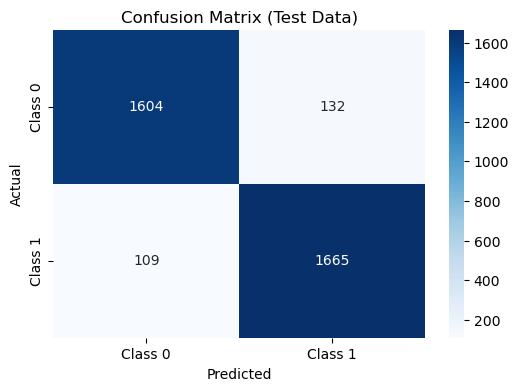

In [77]:
estimators = [
  ["LogisticRegression", LogisticRegression(random_state=0)],
  ["KNeighborsClassifier", KNeighborsClassifier(n_neighbors=100, weights='distance')]
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(random_state=0))
# Train
stacking_clf.fit(X_train, y_train)
# Predict
y_pred_train = stacking_clf.predict(X_train)
y_pred_test = stacking_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)

### Gaussian SVC & Decision Tree -> Logistic

=== Test Metrics ===
Accuracy: 0.9387464387464387
Precision: 0.9386606640405177
Recall: 0.9402480270574972
F1 Score: 0.9394536750211208

=== Training Metrics ===
Accuracy: 0.9653772173541355
Precision: 0.9655270655270656
Recall: 0.9652520649387639
F1 Score: 0.965389545648768

X_train shape: (14037, 30)


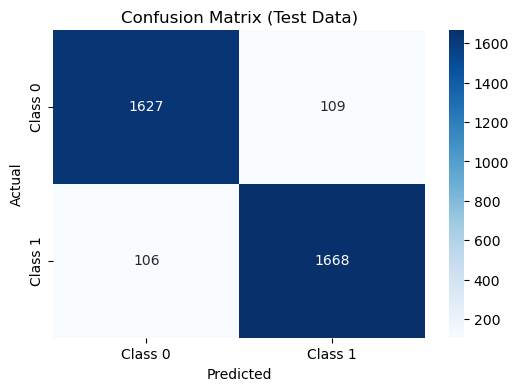

In [80]:
estimators = [
  ["SVC", SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)],
  ["DecisionTreeClassifier", DecisionTreeClassifier(criterion='entropy', random_state=0)]
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=0))
# Train
stacking_clf.fit(X_train, y_train)
# Predict
y_pred_train = stacking_clf.predict(X_train)
y_pred_test = stacking_clf.predict(X_test)
# Evaluate
evaluate_model(y_pred_test, y_pred_train)